In [109]:
import pandas as pd
df=pd.read_csv('7_Smoking Data.csv')
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   region    1338 non-null   int32
 1   age       1338 non-null   int64
 2   sex       1338 non-null   int32
 3   bmi       1338 non-null   int64
 4   children  1338 non-null   int64
 5   smoker    1338 non-null   int32
dtypes: int32(3), int64(3)
memory usage: 47.2 KB


# Encoding using Label Encoder

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [112]:
df.region=le.fit_transform(df['region'])
df.age=le.fit_transform(df['age'])
df.sex=le.fit_transform(df['sex'])
df.bmi=le.fit_transform(df['bmi'])
df.children=le.fit_transform(df['children'])

df.smoker=le.fit_transform(df['smoker'])

df.head()

,region,age,sex,bmi,children,smoker
0,3,1,0,197,0,1
1,2,0,1,350,1,0
2,2,10,1,331,3,0
3,1,15,1,73,0,0
4,1,14,1,223,0,0


# Split the Data   (Training data = 70%    Testing data = 30%)

In [113]:
x=df.drop('smoker',axis=1)
#x.head()

In [125]:
y=df['smoker']
#y.head()

In [115]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70, random_state=42)

In [116]:
xtrain.shape

(936, 5)

In [117]:
xtest.shape

(402, 5)

# Training (Decision Tree)

In [118]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Plot a decision tree

In [119]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(2540.8801715893283, 1598.184, 'X[3] <= 492.5\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(2350.9018376142685, 1532.952, 'X[3] <= 428.5\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(2101.056457422496, 1467.72, 'X[3] <= 427.5\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(2089.2281585353735, 1402.4879999999998, 'X[3] <= 357.5\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(1827.581913255167, 1337.2559999999999, 'X[3] <= 329.5\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(1657.6598519475358, 1272.024, 'X[3] <= 315.5\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(1483.4119137519872, 1206.792, 'X[3] <= 299.0\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(1229.5424284578696, 1141.56, 'X[4] <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(883.3336645468999, 1076.328, 'X[1] <= 29.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(401.97734499205086, 1011.096, 'X[0] <= 0.5\ngini = 0.348\n

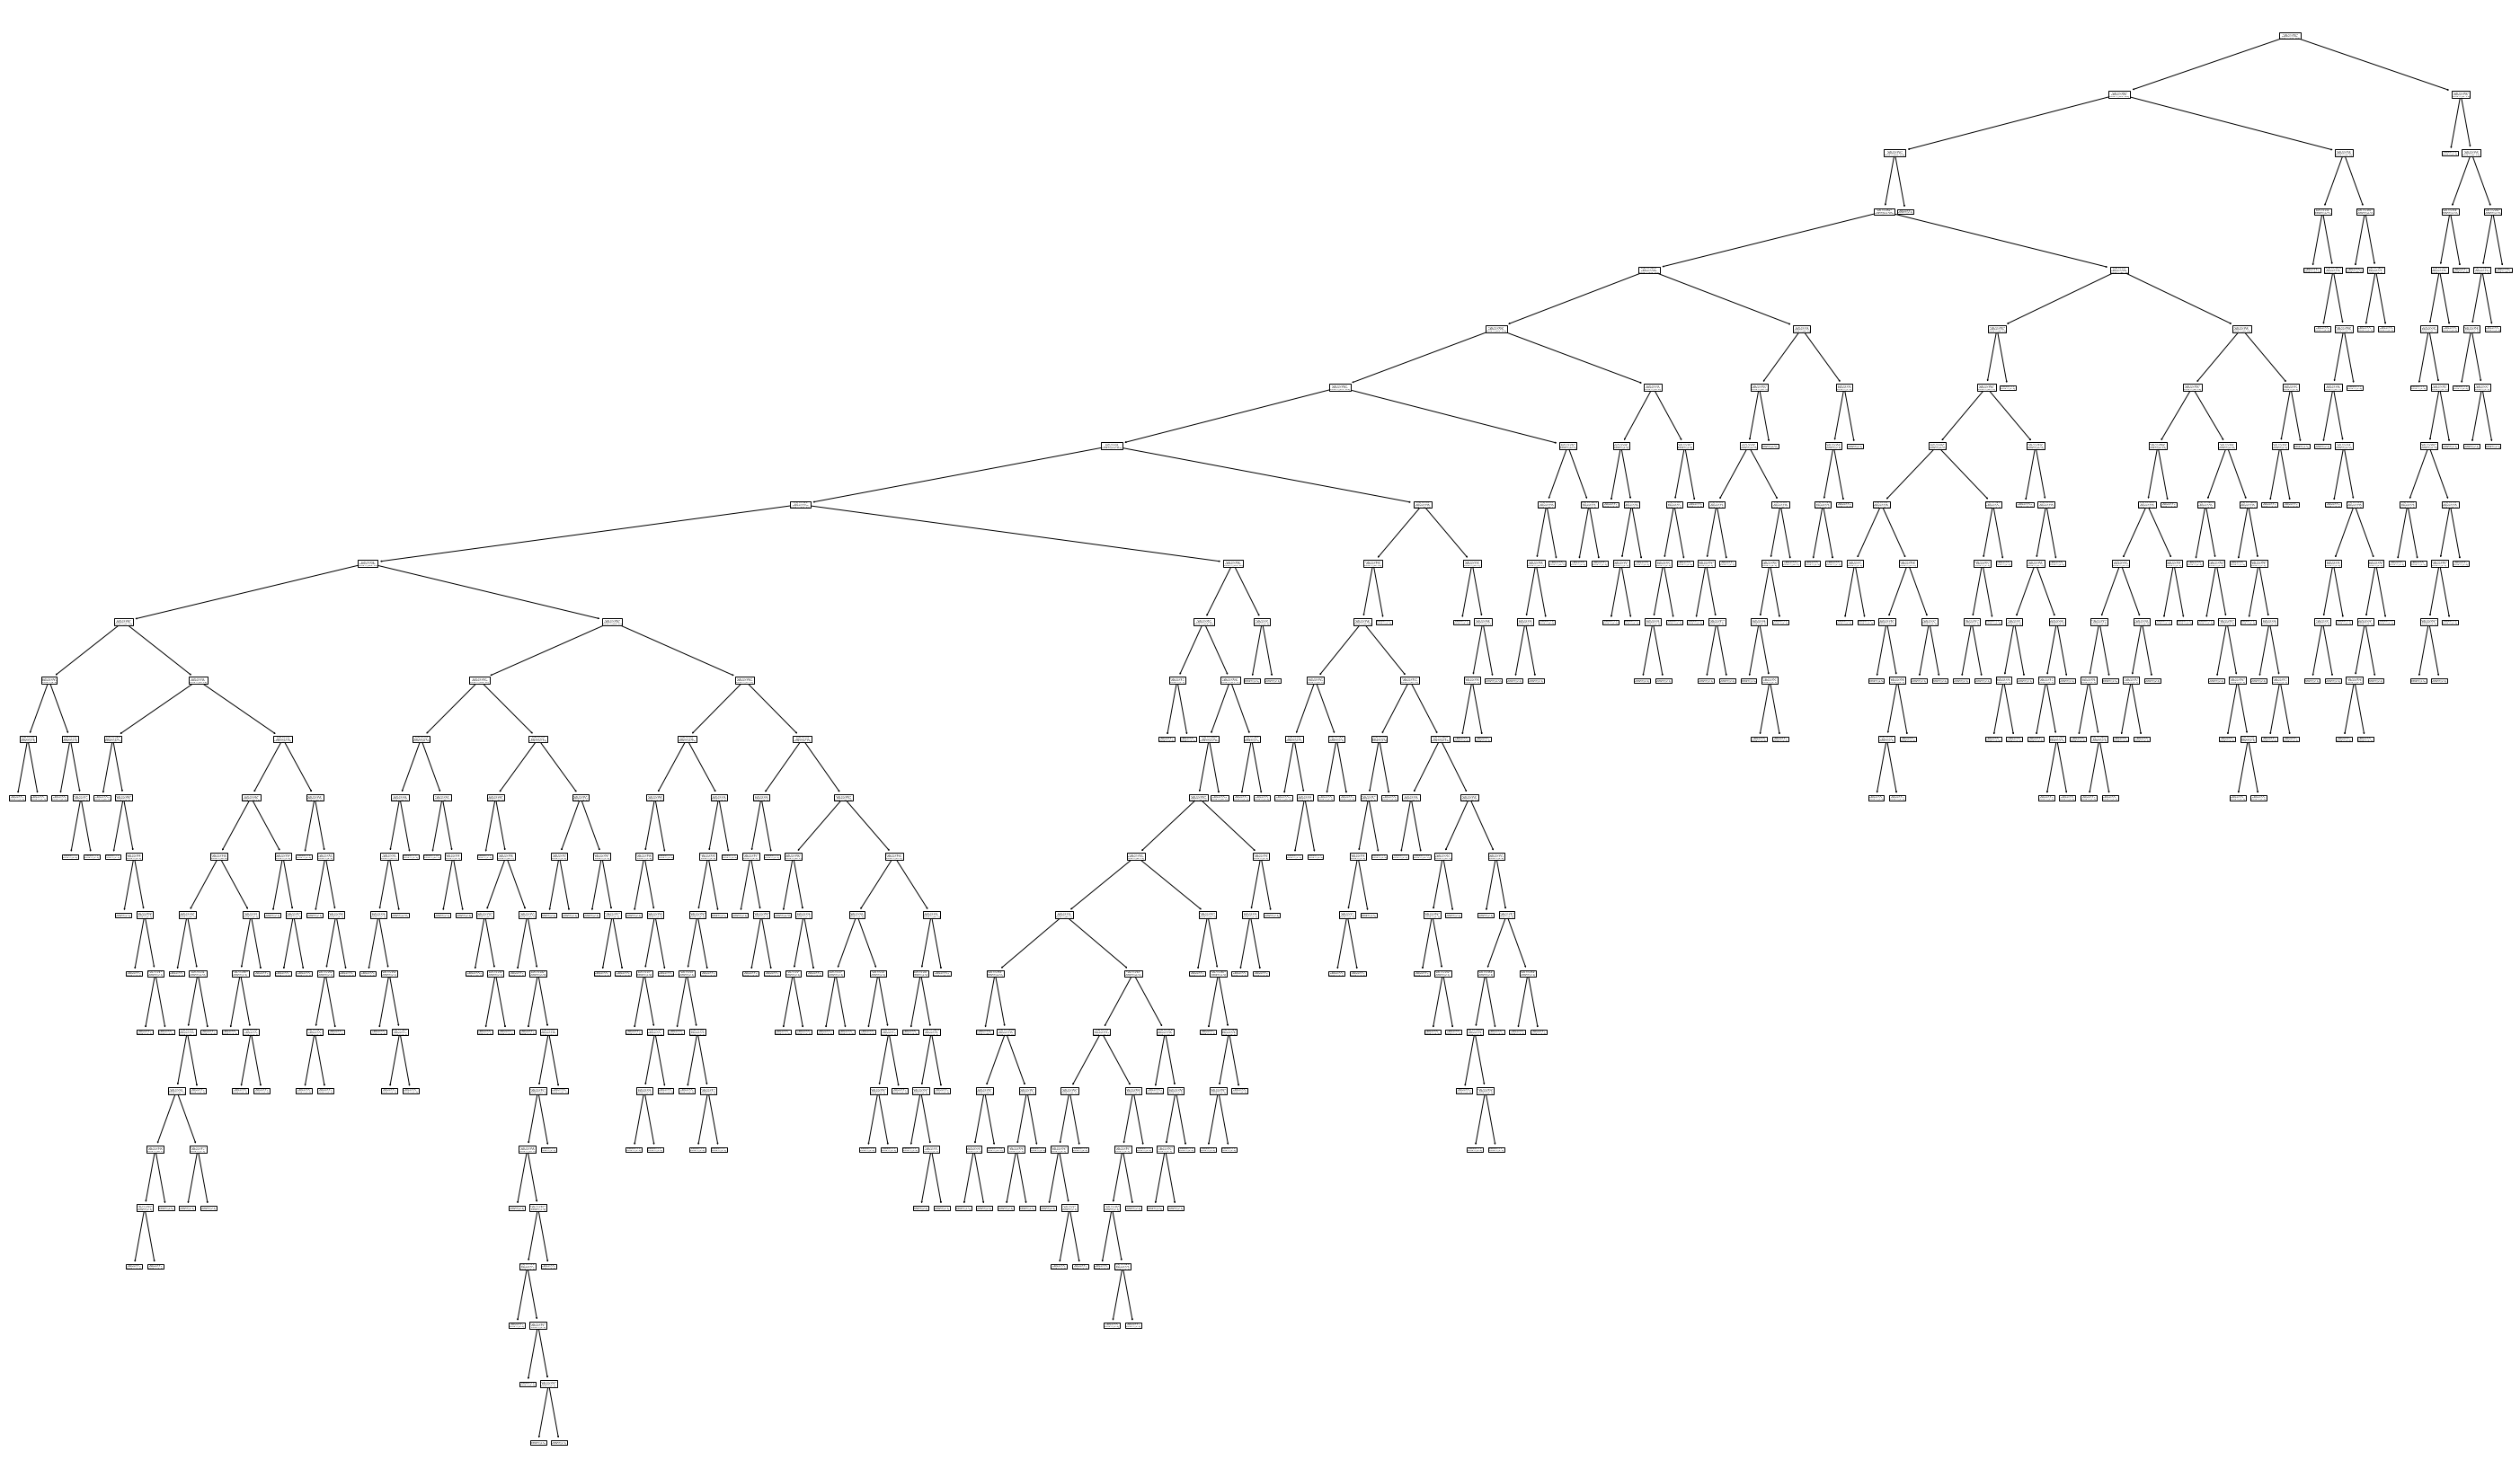

In [120]:
plt.figure(figsize=(50,30))
tree.plot_tree(clf)

# Error Testing

In [122]:
pred=clf.predict(xtest)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred)
mse

0.3333333333333333

In [128]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred)
mse

0.3333333333333333

# Accuracy Test

In [123]:
clf.score(xtest,ytest)

0.6666666666666666